In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read data from CSV file
file_link = '/content/drive/MyDrive/CSE427/Lab- 4/loan_data 1200 (SVM Homework).csv'

# # get the id part of the file
# id = file_link.split("/")[-2]

# # creating a new link using the id for better readability of csv file in pandas
# new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(file_link)
df.shape
# df.count()
# df['Class'].value_counts()
# df.tail()

(1199, 14)

EDA and Pre-processing


In [4]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,NaN,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,NaN,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1


In [5]:
# Verify no missing values remain
df.isnull().sum()

,0
person_age,1
person_gender,7
person_education,17
person_income,17
person_emp_exp,4
person_home_ownership,4
loan_amnt,11
loan_intent,26
loan_int_rate,9
loan_percent_income,12


loan_status
1    626
0    573
Name: count, dtype: int64


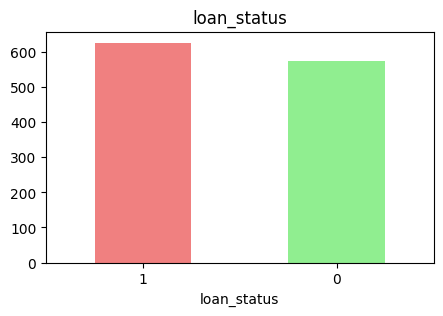

In [6]:

print(df.value_counts('loan_status'))

plt.figure(figsize=(5, 3))
df['loan_status'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('loan_status')
plt.xticks(rotation = 0)
plt.show()

In [7]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical Variables:
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [8]:
#drop duplicates
df = df.drop_duplicates()
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,NaN,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,NaN,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,22.0,female,High School,49445.0,0.0,RENT,16500.0,NaN,10.75,0.33,2.0,615.0,No,1
1195,26.0,female,Bachelor,57881.0,3.0,RENT,16500.0,MEDICAL,11.01,0.29,4.0,515.0,No,1
1196,23.0,male,Bachelor,57630.0,1.0,RENT,16500.0,VENTURE,10.62,0.29,3.0,615.0,No,1
1197,22.0,male,Associate,58425.0,2.0,RENT,16500.0,MEDICAL,8.90,0.28,4.0,607.0,No,1


In [9]:

# Fill missing values in numerical features with column's mean value
numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,3.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,NaN,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,Master,66135.0,1.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,22.0,female,High School,49445.0,0.0,RENT,16500.0,NaN,10.75,0.33,2.0,615.0,No,1
1195,26.0,female,Bachelor,57881.0,3.0,RENT,16500.0,MEDICAL,11.01,0.29,4.0,515.0,No,1
1196,23.0,male,Bachelor,57630.0,1.0,RENT,16500.0,VENTURE,10.62,0.29,3.0,615.0,No,1
1197,22.0,male,Associate,58425.0,2.0,RENT,16500.0,MEDICAL,8.90,0.28,4.0,607.0,No,1


In [10]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])
df.isnull().sum()
df.shape

(1199, 28)

In [11]:
#check for total null value for each feature
df.isnull().sum()

,0
person_age,0
person_income,0
person_emp_exp,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0
loan_status,0
person_gender_female,0


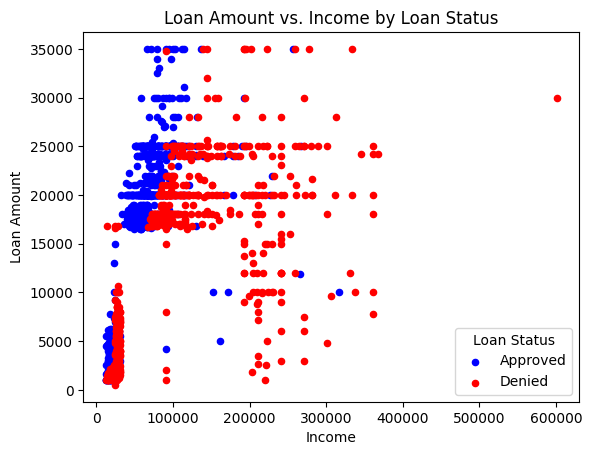

In [12]:
# Filter the dataset into two groups based on loan status
approved_df = df[df['loan_status'] == 1]  # Approved loans (1)
denied_df = df[df['loan_status'] == 0]    # Denied loans (0)


axes = approved_df.plot(kind='scatter', x="person_income", y="loan_amnt", color='blue', label='Approved')
denied_df.plot(kind='scatter', x="person_income", y="loan_amnt", color='red', label='Denied', ax=axes)


plt.title('Loan Amount vs. Income by Loan Status')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.legend(title="Loan Status")
plt.show()


In [13]:
# check for null values
df.isnull().sum()

,0
person_age,0
person_income,0
person_emp_exp,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_cred_hist_length,0
credit_score,0
loan_status,0
person_gender_female,0


In [14]:
df.drop_duplicates()
df.shape

(1199, 28)

In [15]:
# check categorical and numerical columns
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
[]
Numerical Variables:
['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [16]:
import numpy as np


feature_df = df[['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']]

X = np.asarray(feature_df)
y = np.asarray(df['loan_status'])

# Preview the first 3 rows of features and target
print("Features (X) - First 3 rows:")
print(X[0:3])

print("Target (y) - First 3 rows:")
print(y[0:3])


Features (X) - First 3 rows:
[[2.2000e+01 7.1948e+04 0.0000e+00 3.5000e+04 1.6020e+01 4.9000e-01
  3.0000e+00 5.6100e+02]
 [2.1000e+01 1.2282e+04 0.0000e+00 1.0000e+03 1.1140e+01 8.0000e-02
  3.0000e+00 5.0400e+02]
 [2.5000e+01 1.2438e+04 3.0000e+00 5.5000e+03 1.2870e+01 4.4000e-01
  3.0000e+00 6.3500e+02]]
Target (y) - First 3 rows:
[1 0 1]


# Implementing SVM Using Scikit-learn Library

In [17]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(959, 8) (959,)
(240, 8) (240,)


In [18]:
#modeling using SVM
# know more about kernels: https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html
from sklearn import svm
classifier = svm.SVC(kernel='linear', C=100) #default value of kernel is 'rbf'
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [19]:
#result comparison
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

0.825
